In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kushalbanik","key":"04cc9f0efb4d483fe0d575a9929ba8d5"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d andrewmvd/pediatric-pneumonia-chest-xray

 99% 1.13G/1.14G [00:37<00:00, 37.2MB/s]
100% 1.14G/1.14G [00:37<00:00, 32.7MB/s]


In [5]:
from zipfile import ZipFile
filename = 'pediatric-pneumonia-chest-xray.zip'

with ZipFile(filename,'r') as zip:
  zip.extractall()
  print('Done')

Done


Dataset


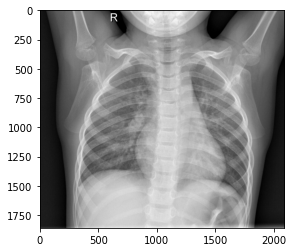

In [6]:
import cv2
import matplotlib.pyplot as plt
pic = cv2.imread('/content/Pediatric Chest X-ray Pneumonia/train/NORMAL/IM-0115-0001.jpeg',1)
plt.imshow(pic)
plt.show()

In [11]:
import cv2
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import os
print('Done')

Done


In [13]:
dir = '/content/Pediatric Chest X-ray Pneumonia/train'
categ = ['NORMAL','PNEUMONIA']

In [14]:
dataset = []
for me in categ:
  path = os.path.join(dir,me)
  cla = categ.index(me)
  for img in os.listdir(path):
    try:
      img_arr = cv2.imread(os.path.join(path,img),1)
      con_img = cv2.resize(img_arr,(100,100))
      dataset.append([con_img,cla])
    except:
      pass  

In [21]:
len(dataset)

5232

In [19]:
import random
random.shuffle(dataset)

In [20]:
for i in dataset[:10]:
  print(i[1])

1
1
1
0
0
1
1
1
1
1


In [22]:
X = []
Y = []
for img,cl in dataset:
  X.append(img)
  Y.append(cl)

In [23]:
X = np.array(X).reshape(-1,100,100,3)
Y = np.array(Y)

In [24]:
print(X.shape)
print(Y.shape)

(5232, 100, 100, 3)
(5232,)


CNN MODEL FOR MAX ACCURACY

In [25]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(64,(3,3),activation = tf.nn.relu,input_shape = (100,100,3)))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation = tf.nn.relu))
model.add(keras.layers.MaxPooling2D(2,2))


model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64,activation = tf.nn.relu))
model.add(keras.layers.Dense(128,activation = tf.nn.relu))
model.add(keras.layers.Dense(1,activation = tf.nn.sigmoid))


In [26]:
model.compile(optimizer = 'Adadelta',loss ='binary_crossentropy',metrics=['accuracy'])

SUMMARY OF THE MODEL

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 67712)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                4333632   
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8

In [28]:
model.fit(X,Y,epochs = 10)

Epoch 1/10
164/164 [==============================] - 4s 24ms/step - loss: 0.4984 - accuracy: 0.7892
Epoch 2/10
164/164 [==============================] - 4s 24ms/step - loss: 0.2591 - accuracy: 0.8907
Epoch 3/10
164/164 [==============================] - 4s 24ms/step - loss: 0.1995 - accuracy: 0.9193
Epoch 4/10
164/164 [==============================] - 4s 23ms/step - loss: 0.1695 - accuracy: 0.9373
Epoch 5/10
164/164 [==============================] - 4s 23ms/step - loss: 0.1551 - accuracy: 0.9388
Epoch 6/10
164/164 [==============================] - 4s 24ms/step - loss: 0.1370 - accuracy: 0.9457
Epoch 7/10
164/164 [==============================] - 4s 24ms/step - loss: 0.1232 - accuracy: 0.9501
Epoch 8/10
164/164 [==============================] - 4s 24ms/step - loss: 0.1230 - accuracy: 0.9528
Epoch 9/10
164/164 [==============================] - 4s 23ms/step - loss: 0.1164 - accuracy: 0.9564
Epoch 10/10
164/164 [==============================] - 4s 24ms/step - loss: 0.1077 - accura

TEST DATASET


In [29]:
testdir = '/content/Pediatric Chest X-ray Pneumonia/test'
ca = ['NORMAL','PNEUMONIA']

In [31]:
test_data = []
for c in ca:
  path = os.path.join(testdir,c)
  idx = categ.index(c)
  for img in os.listdir(path):
    try:
      img_arr = cv2.imread(os.path.join(path,img),1)
      new_arr = cv2.resize(img_arr,(100,100))
      test_data.append([new_arr,idx])
    except:
      pass  

In [32]:
X_test = []
Y_test = []

In [33]:
for img,cl in test_data:
  X_test.append(img)
  Y_test.append(cl)

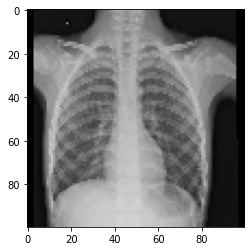

In [34]:
plt.imshow(X_test[0])
plt.show()

In [35]:
X_T = np.array(X_test).reshape(-1,100,100,3)
Y_T = np.array(Y_test)

In [36]:
X_T.shape

(624, 100, 100, 3)

In [37]:
model.evaluate(X_T,Y_T)

20/20 [==============================] - 0s 7ms/step - loss: 0.4510 - accuracy: 0.8221


[0.4510001540184021, 0.8221153616905212]

ACCURACY IS 82 % OF MY TEST SET.

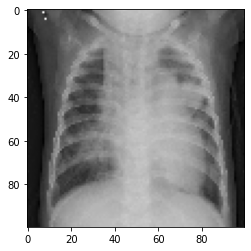

1
Pneomonia Affected!


In [42]:
c = [X_T,Y_T]

po = 340

img = c[0][po]
lbl = c[1][po]
plt.imshow(img)
plt.show()
print(lbl)

img = img.reshape(100,100,3)
pre = model.predict(X_T)
if (pre[po] > 0.5):
  print('Pneomonia Affected!')
else:
  print('NO risk')
